<a href="https://colab.research.google.com/github/SWeat-python-weekend-study/jisun_So/blob/main/WEEK4_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np



In [9]:
df = pd.read_csv('trns_1day_series.csv')
df.head()

,SEND,RECV,APPROVAL,REJECT
0,4779,5045,4024,755
1,5103,5055,4196,907
2,5035,5073,4653,382
3,4757,4762,4530,227
4,4639,4664,4425,214


In [12]:
df.describe()

,SEND,RECV,APPROVAL,REJECT
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,10274.082639,10274.831944,10062.034722,212.047917
std,6683.456958,6683.442065,6584.390468,135.078228
min,769.000000,769.000000,714.000000,16.000000
25%,3580.750000,3579.250000,3469.000000,84.000000
50%,11115.000000,11133.500000,10901.500000,210.500000
75%,15745.000000,15729.250000,15451.000000,305.000000
max,24859.000000,24911.000000,24565.000000,907.000000


In [15]:
len(df)



1440

In [16]:
pd.date_range('00:00', '23:59', freq='1min')


DatetimeIndex(['2021-03-08 00:00:00', '2021-03-08 00:01:00',
               '2021-03-08 00:02:00', '2021-03-08 00:03:00',
               '2021-03-08 00:04:00', '2021-03-08 00:05:00',
               '2021-03-08 00:06:00', '2021-03-08 00:07:00',
               '2021-03-08 00:08:00', '2021-03-08 00:09:00',
               ...
               '2021-03-08 23:50:00', '2021-03-08 23:51:00',
               '2021-03-08 23:52:00', '2021-03-08 23:53:00',
               '2021-03-08 23:54:00', '2021-03-08 23:55:00',
               '2021-03-08 23:56:00', '2021-03-08 23:57:00',
               '2021-03-08 23:58:00', '2021-03-08 23:59:00'],
              dtype='datetime64[ns]', length=1440, freq='T')

In [19]:
df['TIME'] = pd.date_range('00:00', '23:59', freq='1min')
df = df.set_index('TIME')
df

,SEND,RECV,APPROVAL,REJECT
TIME,,,,
2021-03-08 00:00:00,4779,5045,4024,755
2021-03-08 00:01:00,5103,5055,4196,907
2021-03-08 00:02:00,5035,5073,4653,382
2021-03-08 00:03:00,4757,4762,4530,227
2021-03-08 00:04:00,4639,4664,4425,214
...,...,...,...,...
2021-03-08 23:55:00,5280,5269,5110,170
2021-03-08 23:56:00,5202,5210,5056,146
2021-03-08 23:57:00,5210,5221,5006,204


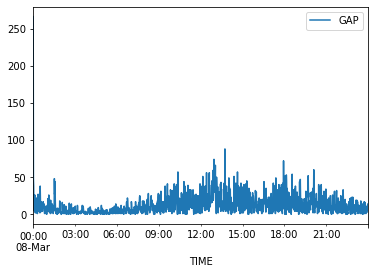

In [21]:
df['GAP'] = np.abs ( df.SEND - df.RECV )
df.plot(y='GAP')

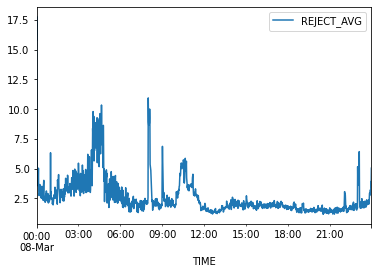

In [22]:
df['REJECT_AVG'] = df.REJECT / (df.APPROVAL + df.REJECT) * 100
df.plot(y='REJECT_AVG')

In [23]:
len(df)

1440

In [24]:
np.arange(0, len(df))

array([   0,    1,    2, ..., 1437, 1438, 1439])

In [25]:
np.array(df.APPROVAL)

array([4024, 4196, 4653, ..., 5006, 4935, 4940])

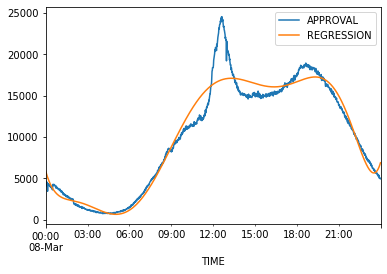

In [27]:
fp = np.polyfit( np.arange(0, len(df)), np.array(df.APPROVAL), 8)
fd = np.poly1d(fp)
df['REGRESSION'] = fd( np.arange(0, len(df)) )
df.plot(y=['APPROVAL','REGRESSION'])

In [29]:
((df.APPROVAL-df.REGRESSION) **2).sum() / 1440

2289273.532760556

In [30]:
((df.APPROVAL - df.REGRESSION) **2).mean()

2289273.5327605517

In [32]:
mse=((df.APPROVAL- df.REGRESSION) **2).mean()
rmse = np.sqrt(mse)
rmse, mse

(1513.0345444703341, 2289273.5327605517)

In [34]:
hh_list = np.array ( df.APPROVAL ).reshape(24, 60)

In [35]:
hh_list.shape

(24, 60)

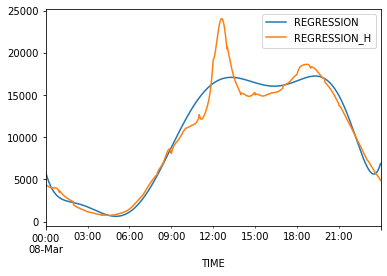

In [38]:
reg_list = []
for mm_list in hh_list:
  x = np.arange(0, 60)
  y = mm_list
  fp = np.polyfit(x, y, 4)
  fn = np.poly1d(fp)
  reg_list.append(fn(x))

df['REGRESSION_H'] = np.array(reg_list).flatten() 
df.plot(y=['REGRESSION','REGRESSION_H']) 